# Session 1 - Data Engineering For Analytics

## Webscraping a website using Python

We will webscrape using Python and the BeautifulSoup package. 
In this example, we will use a url of best restaurants in Chicago's Chinatown, Greektown, Loop, and River North.  

In [1]:
#Import packages
from bs4 import BeautifulSoup as soup
#import urllib2
from urllib.request import urlopen, urlretrieve
import urllib
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
# URLs I want to scrape
yelp_url_chinatown = 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chinatown%2C+Chicago%2C+IL&ns=1'
yelp_url_greektown = 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Greektown,+Chicago,+IL'
yelp_url_rivernorth = 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=river+north%2C+Chicago%2C+IL+60616&ns=1'

In [3]:
# Create a function that will parse the html from the given URL.  It'll then scrape the fields including:
# Name, reviews, rating, etc.  

def yelp_data(url):
    my_page = urlopen(url)
    my_soup = soup(my_page, "html.parser")
    data = []  # Create an empty list to store the data
    containers = my_soup.findAll("li", {"class":"regular-search-result"})  # Searches for the specific html class to store scraped data
    for container in containers:   # Iterate through each 'container' and stores the below attributes
        name = container.find("a", {"class":"biz-name"}).contents[0].text.strip() # name of the restaurants
        # Number of reviews
        reviews = container.find("span", {"class":"review-count rating-qualifier"}).contents[0].strip().split(' ', 1)[0]
        rating = container.find("img", {"class":"offscreen"}) # collects tag for rating
        # price
        try:
            price = container.find("span", {"class":"business-attribute price-range"}).contents[0].strip()
        except AttributeError:
            price = ""
        # category of restaurant
        category = container.find("span", {"class":"category-str-list"}).text.replace("\n","").replace(" ","").strip() 
        # Neighborhood
        try:
            neighborhood = container.find("span", {"class":"biz-city"}).text.strip()
        except AttributeError:
            neighborhood = container.find("span", {"class":"neighborhood-str-list"}).text.strip()
        try:
            address = container.find("address").text.strip()
        except AttributeError:
            address = ""
        phone = container.find("span", {"class":"biz-phone"}).text.strip() 
        photo = container.find("img", {"class":"scrollable-photos_img"})['src']
        data.append({"name": name, "reviews": reviews, "rating": str(rating)[10:13], "price": price,"category": category\
                     ,"neighborhood": neighborhood, "address":address, "phone":phone, "photo_url":photo})
    return(data)


In [4]:
# Use the function to create a dataframe of the Neighborhood we selected.
yelp_chinatown = pd.DataFrame(yelp_data(yelp_url_chinatown))

In [5]:
# Count number of price 
yelp_chinatown['num_price'] = yelp_chinatown['price'].apply(lambda x: len(x)) 
yelp_chinatown['search_area'] = "Chinatown"

KeyError: 'price'

In [6]:
yelp_chinatown.head()

,address,category,name,neighborhood,phone,photo_url,price,rating,reviews,num_price,search_area
0,2222 S Archer Ave,"DimSum,Bars,Seafood",Dolo Restaurant and Bar,Chinatown,(312) 877-5117,https://s3-media1.fl.yelpcdn.com/bphoto/jk86Qt...,$$,4.0,371,2,Chinatown
1,2168 S Archer Ave,"Seafood,DimSum,Cantonese",MingHin Cuisine,Chinatown,(312) 808-1999,https://s3-media3.fl.yelpcdn.com/bphoto/tJlRSu...,$$,4.0,1869,2,Chinatown
2,2002 S Wentworth Ave,"Chinese,Barbeque",Qing Xiang Yuan Dumplings,Chinatown,(312) 799-1118,https://s3-media3.fl.yelpcdn.com/bphoto/d0I1bE...,$$,4.0,614,2,Chinatown
3,2138 South Archer Ave,Chinese,MCCB Chicago 时尚食谱,Chinatown,(312) 881-0168,https://s3-media2.fl.yelpcdn.com/bphoto/Jnmu_r...,$$,4.5,139,2,Chinatown
4,243 W Cermak Rd,Szechuan,Szechwan JMC,Chinatown,(312) 929-2212,https://s3-media3.fl.yelpcdn.com/bphoto/MByW_k...,$$,4.5,23,2,Chinatown


In [7]:
yelp_greektown = pd.DataFrame(yelp_data(yelp_url_greektown))
yelp_greektown['num_price'] = yelp_greektown['price'].apply(lambda x: len(x)) 
yelp_greektown['search_area'] = "Greektown"

In [10]:
yelp_rivernorth = pd.DataFrame(yelp_data(yelp_url_rivernorth))
yelp_rivernorth['num_price'] = yelp_rivernorth['price'].apply(lambda x: len(x)) 
yelp_rivernorth['search_area'] = "River North"

In [20]:
# Excercise : add analysis for west loop

In [12]:
# Store the data as a csv
yelp_chinatown.to_csv("yelp_chinatown.csv")
yelp_greektown.to_csv("yelp_greektown.csv")
yelp_rivernorth.to_csv("yelp_rivernorth.csv")

The column 'photo_url' contains the url for the image of each restaurant on yelp. The following function will download the image from the given URL.

In [13]:
# Create a function that download the images from the URL in the 'photo_url' column in the df.
def download_images(df):
    for x in range(len(df)):
        urllib.request.urlretrieve(df.loc[x, 'photo_url'], "%s_img.jpg" %df.loc[x,'name'])

# Data Analysis and visuals of the data

In [14]:
# Combine the dataframes of the neighborhoods we scraped and collected into one dataframe.
combined_df = pd.concat([yelp_chinatown, yelp_greektown, yelp_rivernorth])

In [15]:
combined_df.head()

,address,category,name,neighborhood,phone,photo_url,price,rating,reviews,num_price,search_area
0,2222 S Archer Ave,"DimSum,Bars,Seafood",Dolo Restaurant and Bar,Chinatown,(312) 877-5117,https://s3-media1.fl.yelpcdn.com/bphoto/jk86Qt...,$$,4.0,371,2,Chinatown
1,2168 S Archer Ave,"Seafood,DimSum,Cantonese",MingHin Cuisine,Chinatown,(312) 808-1999,https://s3-media3.fl.yelpcdn.com/bphoto/tJlRSu...,$$,4.0,1869,2,Chinatown
2,2002 S Wentworth Ave,"Chinese,Barbeque",Qing Xiang Yuan Dumplings,Chinatown,(312) 799-1118,https://s3-media3.fl.yelpcdn.com/bphoto/d0I1bE...,$$,4.0,614,2,Chinatown
3,2138 South Archer Ave,Chinese,MCCB Chicago 时尚食谱,Chinatown,(312) 881-0168,https://s3-media2.fl.yelpcdn.com/bphoto/Jnmu_r...,$$,4.5,139,2,Chinatown
4,243 W Cermak Rd,Szechuan,Szechwan JMC,Chinatown,(312) 929-2212,https://s3-media3.fl.yelpcdn.com/bphoto/MByW_k...,$$,4.5,23,2,Chinatown


In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 59
Data columns (total 11 columns):
address         140 non-null object
category        140 non-null object
name            140 non-null object
neighborhood    140 non-null object
phone           140 non-null object
photo_url       140 non-null object
price           140 non-null object
rating          140 non-null object
reviews         140 non-null object
num_price       140 non-null int64
search_area     140 non-null object
dtypes: int64(1), object(10)
memory usage: 13.1+ KB


In [17]:
# Convert a couple of the fields to a numeric type
combined_df['reviews'] = pd.to_numeric(combined_df['reviews'])
combined_df['rating'] = pd.to_numeric(combined_df['rating'])

<BarContainer object of 140 artists>

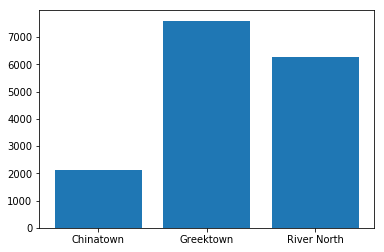

In [18]:
# Create a bar chart of the total number of reviews of the top 30 restaurants of the neighborhoods.
# Notice that the number of reviews in Chinatown is much lower than the other neighborhoods.
plt.bar(combined_df['search_area'],combined_df['reviews'])

([<matplotlib.axis.YTick at 0x1af2818beb8>,
 <a list of 7 Text yticklabel objects>)

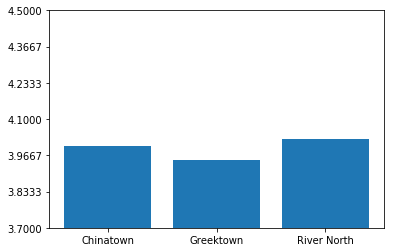

In [19]:
# Let's look at the average rating for each neighborhood.
# Restaurants in the loop tend to have a higher average rating.
fig, ax = plt.subplots()

avg_rating_by_area = combined_df.groupby(['search_area'])['rating'].mean().reset_index()

y = np.linspace(3.7, 4.5, 7)
ax.set_ylim(min(y), max(y))

plt.bar(avg_rating_by_area['search_area'], avg_rating_by_area['rating'])
plt.yticks(y)
